<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab09/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab09/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Arquiteturas complexas de Redes Neurais Convolucionais 
  - Aprendizagem por transferência
  - Praticar a classificação de objeto usando framework TensorFlow
  

## Arquitetura de Redes Neurais Convolucionais

Existem diversas arquitetura de CNN, cada rede com suas próprias características, principalmente para visão computacional. Mas todas terão em comum camadas de convolução e maxpooling, dropout e algumas coisas a mais...


### Por que utilizar uma arquitetura CNN

Utilizar uma arquitetura de CNN possibilita reduzir o tempo de pesquisa com o desenvolvimento de novas arquiteturas uma vez que essas arquiteturas já foram sistematicamente revisadas.



### Exemplos de arquiteturas:

`LeNET`: Desenvolvida em 1998 por Yann LeCun, a LeNet foi pioneira no uso de camadas de convolução com filtros 5x5 e passo 1, além de camadas de agrupamento com filtros 2x2 e passo 2, intercaladas por camadas totalmente conectadas (FC). A ordem das camadas é: CONV-POOL-CONV-POOL-FC-FC. Essa arquitetura teve um papel fundamental no reconhecimento de dígitos manuscritos.

![](https://pt.d2l.ai/_images/lenet.svg)

`AlexNET`: Criada em 2012 por Alex Krizhevsky, Ilya Sutskever e Geoffrey Hinton, a AlexNet é uma arquitetura mais avançada que a LeNet. Possui cinco camadas convolucionais seguidas de três camadas FC, e emprega a função de ativação ReLU. Vencedora da competição ImageNet de 2012, marcou o início da popularização das redes neurais convolucionais profundas.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*pJ3o_2zTTNnixhKH.png)

`VGG`: A arquitetura VGG, concebida em 2014 pelo Visual Geometry Group da Universidade de Oxford, propôs o uso de filtros menores (3x3) em redes mais profundas, com no mínimo 16 camadas convolucionais e maxpooling com filtros 2x2. Apesar de os filtros menores gerarem menos parâmetros, as camadas FC e as convoluções iniciais demandavam grande quantidade de memória RAM, resultando em uma rede pesada.

![](https://production-media.paperswithcode.com/methods/vgg_7mT4DML.png)

`GoogleNET`: Paralelamente à VGG, em 2014, pesquisadores do Google desenvolveram a GoogleNet, que introduziu o módulo Inception como elemento fundamental. Com nove módulos Inception em sequência, a arquitetura utiliza convoluções 3x3 e 5x5 precedidas por convoluções 1x1 para diminuir o custo computacional. A GoogleNet foi projetada para ser eficiente em termos de recursos e venceu a competição ImageNet de 2014.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png)


`ResNET`: A rede residual, proposta em 2015 por Kaiming He e colaboradores, tem como característica principal a inclusão de conexões residuais (curto-circuitos) a cada duas convoluções, adicionando um resultado anterior ao resultado futuro. Isso permite treinar redes mais profundas sem problemas de degradação do desempenho. ResNets com 50, 101 e 152 camadas utilizam blocos residuais com "bottleneck", que consistem em duas convoluções 3x3 intercaladas por convoluções 1x1, diminuindo o custo computacional.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*9LqUp7XyEx1QNc6A.png)

`MobileNet`: Proposta em 2017, é uma arquitetura otimizada para dispositivos móveis e aplicativos com limitações de recursos computacionais. Utiliza convoluções separáveis por profundidade para reduzir o número de parâmetros e o consumo de memória.

`EfficientNet`: Proposta em 2019, é uma família de redes neurais convolucionais que busca melhorar a eficiência em termos de recursos computacionais e desempenho, através do ajuste coordenado da largura, profundidade e resolução das redes.

`InceptionV3`: Uma evolução do GoogleNet, a InceptionV3 é uma arquitetura desenvolvida em 2015 que aprimora o módulo Inception e implementa técnicas de normalização em lotes. Essa arquitetura alcança um desempenho superior com menos parâmetros e menor custo computacional.

`DenseNet`: Proposta em 2016, a DenseNet é uma arquitetura que introduz conexões densas entre as camadas. Cada camada recebe as características de todas as camadas anteriores, o que melhora o fluxo de informações e gradientes durante o treinamento. Isso permite a construção de redes mais profundas e eficientes.

`YOLO` (You Only Look Once): É uma arquitetura de rede neural focada em detecção de objetos em tempo real. Proposta em 2016, a YOLO divide a imagem em regiões e prevê, de uma só vez, as probabilidades de classes e as coordenadas das caixas delimitadoras. A YOLO é conhecida por sua velocidade e capacidade de detectar objetos em tempo real.

`Transformer`: Embora não seja uma arquitetura de rede neural convolucional, o Transformer, proposto em 2017, é uma arquitetura de rede neural notável para processamento de linguagem natural e outras tarefas sequenciais. O Transformer introduziu o conceito de atenção auto-regressiva, que permite que a rede aprenda relacionamentos complexos entre as entradas, e tem sido a base para modelos de linguagem de última geração, como BERT e GPT.


Parace que são muitas, mas essas são apenas algumas arquiteturas de redes neurais desenvolvidas nos últimos anos. Dependendo da aplicação e das restrições de recursos, você pode encontrar uma arquitetura adequada às suas necessidades específicas.

### Modelos de CNN pré-treinados

O treinamento de uma boa CNN não é simples, além de muitos dados (milhares de imagens) e muito tempo de processamento.

Mas usar essas redes é super super facil!! 

Vamos usar o VGG16 para fazer a classificação de uma imagem.

Recomendo dar uma olhada na documentação oficial do Keras:  [https://keras.io/api/applications/](https://keras.io/api/applications/)


In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image


## importa o modelo da VGG16 pré-treinado
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions



In [3]:
# Carrega o modelo VGG16 pré-treinado com ImageNet:
model = VGG16(weights='imagenet')


In [4]:
# Carrega uma imagem e prepara para ser predita pela VGG16

img_path = 'dog.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("A imagem é carregada e transformada de {}, para {}".format(img.size,x.shape))

A imagem é carregada e transformada de (224, 224), para (1, 224, 224, 3)


In [5]:
## faz a predição da imagem

preds = model.predict(x)


1/1 [==============================] - 8s 8s/step


In [6]:
decoded_preds = decode_predictions(preds)[0]

for i, (imagenet_id, label, score) in enumerate(decoded_preds):
    print(f"{i+1}. {label}: {score * 100:.2f}%")


1. Blenheim_spaniel: 91.16%
2. Brittany_spaniel: 5.31%
3. Welsh_springer_spaniel: 0.89%
4. cocker_spaniel: 0.75%
5. Saint_Bernard: 0.40%


## Desafio 1

Agora avalie outras arquiteturas de redes neurais disponíveis no Keras, como ResNet50, InceptionV3, MobileNet e EfficientNet. 

Basta substituir a importação e a função de carregamento do modelo conforme necessário. Por exemplo, para usar a ResNet50:

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')


#### seu código aqui....




##Introdução ao Transfer Learning com redes pré-treinadas

Excelente! Agora que já sabemos como utilizar uma rede pré-treinada, vamos explorar uma técnica poderosa chamada Transfer Learning (Aprendizagem por Transferência). Essa abordagem nos permite tirar proveito das arquiteturas de redes neurais existentes e treiná-las para classificar objetos personalizados ou novas categorias de imagens.

O Transfer Learning é uma técnica em que um modelo de aprendizado profundo, treinado previamente em um conjunto de dados maior e mais diversificado, é adaptado para ser aplicado a um novo problema. O conhecimento adquirido pelo modelo original é transferido para o novo problema, permitindo um treinamento mais rápido e, muitas vezes, um desempenho melhor do que treinar uma rede neural do zero.

A ideia por trás do Transfer Learning é que as redes neurais pré-treinadas, como VGG, ResNet e Inception, já aprenderam a ``extrair características`` importantes das imagens em seus primeiros estágios. Essas características podem ser comuns a muitos problemas de classificação de imagens, como detecção de bordas, texturas e padrões. Ao aproveitar esse conhecimento prévio, podemos nos concentrar no treinamento das últimas camadas do modelo, que são responsáveis por aprender características específicas do novo problema.

Ao utilizar o Transfer Learning, podemos economizar tempo e recursos computacionais, além de obter melhores resultados do que treinar uma rede do zero para um conjunto de dados menor e específico. Portanto, é uma técnica amplamente utilizada em aplicações práticas de aprendizado profundo e processamento de imagens.



## Combinando a rede pré-treinada com um classificador MLP

Ao aplicar o Transfer Learning, nossa rede convolucional será composta por duas partes principais: o extrator de características e o classificador. O extrator de características será baseado em uma rede pré-treinada, como VGG16, ResNet50 ou InceptionV3. Essa parte da rede já aprendeu a extrair características relevantes de imagens, como bordas, texturas e padrões, durante o treinamento em um grande conjunto de dados, como o ImageNet.

Em seguida, adicionaremos um classificador MLP (Multilayer Perceptron) personalizado para resolver o nosso problema específico de classificação de imagens. Esse classificador será responsável por aprender as características específicas do novo conjunto de dados e classificar as imagens nas categorias desejadas.

Dessa forma, a rede ajustada combina o poder das redes pré-treinadas, que já aprenderam a extrair características gerais de imagens, com um classificador personalizado que aprenderá a distinguir as categorias específicas do nosso problema. Como mostra a figura abaixo:

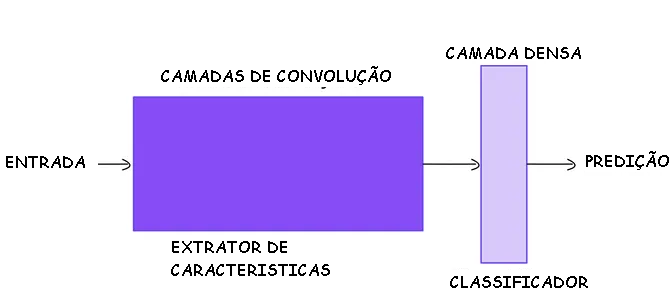

Agora que entendemos os conceitos básicos de Transfer Learning, podemos prosseguir com os passos para aplicar o Transfer Learning e adaptar a rede pré-treinada ao nosso problema de classificação de imagens. 

##Passo a passo para aplicar Transfer Learning

1. Escolha uma rede pré-treinada: Selecione uma rede neural pré-treinada disponível no Keras (por exemplo, VGG16, ResNet50, InceptionV3) com base nas características e requisitos do seu problema. Cada arquitetura tem suas próprias vantagens e desvantagens, portanto, escolha aquela que melhor se adapta às suas necessidades.

2. Remova a camada de classificação: Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento include_top=False ao carregar o modelo no Keras. Isso permitirá que você adicione suas próprias camadas personalizadas para classificar as novas categorias.

3. Adicione camadas personalizadas: Adicione camadas específicas para o seu problema de classificação. Normalmente, isso inclui uma camada de GlobalAveragePooling2D, seguida por uma camada densa com uma função de ativação softmax e o número de neuronios igual ao número de classes do novo problema.

4. Congele as camadas pré-treinadas: É uma boa prática congelar as camadas pré-treinadas da rede neural, especialmente durante as primeiras épocas do treinamento. Isso evitará que os pesos dessas camadas sejam atualizados e preservará o conhecimento prévio que elas possuem. No Keras, você pode fazer isso com o modelxxx.trainable = False

5. Pré-processamento dos dados: Prepare os dados de acordo com a rede pré-treinada escolhida. Isso inclui redimensionar as imagens, normalizar os valores dos pixels e codificar as etiquetas das categorias. Lembre-se de aplicar as mesmas transformações usadas no conjunto de dados original da rede pré-treinada.

6. Treine o modelo: Treine o modelo ajustado no seu conjunto de dados. Durante as primeiras épocas, com as camadas pré-treinadas congeladas, o modelo aprenderá as características específicas do novo problema. 

7. Avalie e otimize: Avalie o desempenho do modelo ajustado em um conjunto de teste e otimize os hiperparâmetros conforme necessário. Você pode experimentar diferentes arquiteturas de redes neurais, taxas de aprendizado, otimizadores e outros hiperparâmetros para encontrar a melhor configuração para o seu problema.

In [8]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [9]:
import tensorflow_datasets as tfds


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

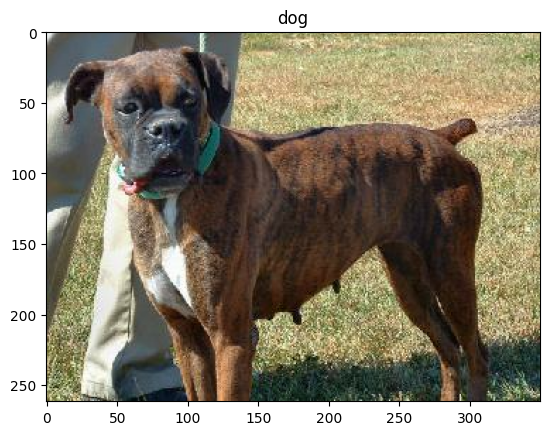

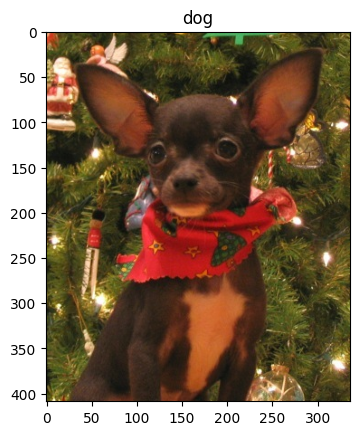

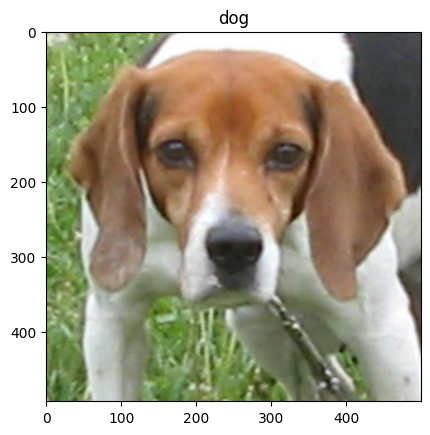

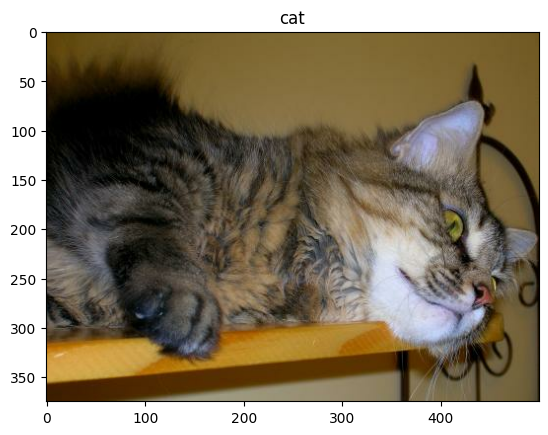

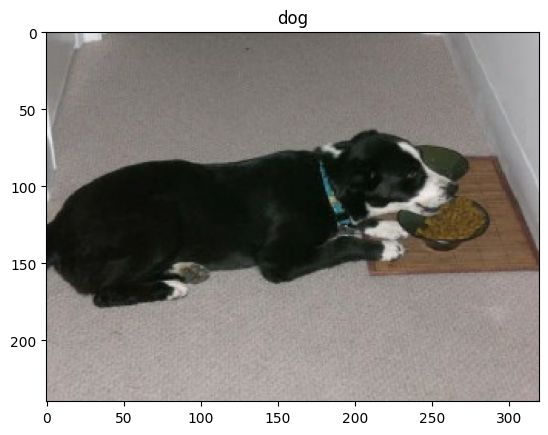

In [10]:
get_label_name = metadata.features['label'].int2str  # ajusta o dataset

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [11]:
#Resize da imagem

IMG_SIZE = 160 #  160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

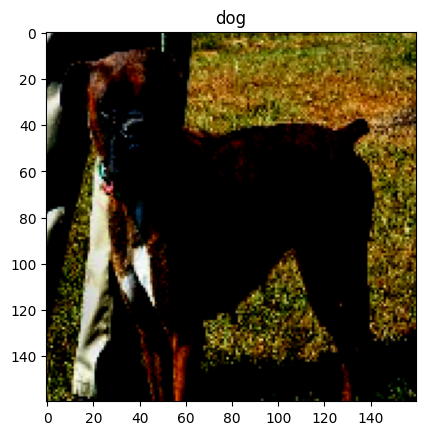

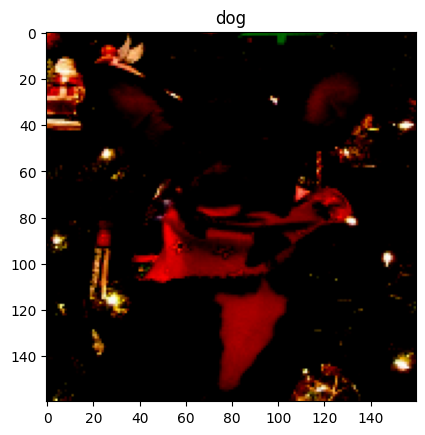

In [12]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [13]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

#embaralha as imagens e separa em batchs
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

### Escolhendo um modelo pré-treinado

A `MobileNet V2` desenvolvido no Google e foi treinado com `1,4 milhão de imagens` e possui `1000 classes diferentes` com pesos predeterminados do imagenet (Googles dataset).

Carregue a rede neural pré-treinada sem a camada de classificação final. Isso pode ser feito usando o argumento ``include_top=False``


In [14]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Cria o base_model referente a MobileNet V2, sem a camada de classificação
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [16]:
#Congela a base_model para não atuaizar os pesos quando treinar.

base_model.trainable = False

In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

### Adicionando um Classificador

In [18]:
#Camada  para gerar um vetor de 1280 elementos 
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# O Classificador para gato cachorro com 1 neuronio 
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

In [19]:
model = tf.keras.Sequential([
  base_model,   #### cnn mobilenet
  global_average_layer, ###flatten
  prediction_layer ### especiallista
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


Pronto! Já criamos a nossa rede para classificação. Agora podemos treinar nossa rede e testar.

### Treinamento do modelo

In [20]:
#base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
#Avaliação do modelo antes de treiná-lo com novas imagens
initial_epochs = 1
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 4s 52ms/step - loss: 0.6392 - accuracy: 0.6656


In [22]:
# Treinamento da nova CNN

history = model.fit(train_batches, epochs=initial_epochs, validation_data=validation_batches)


582/582 [==============================] - 54s 84ms/step - loss: 0.0746 - accuracy: 0.9746 - val_loss: 0.0486 - val_accuracy: 0.9841


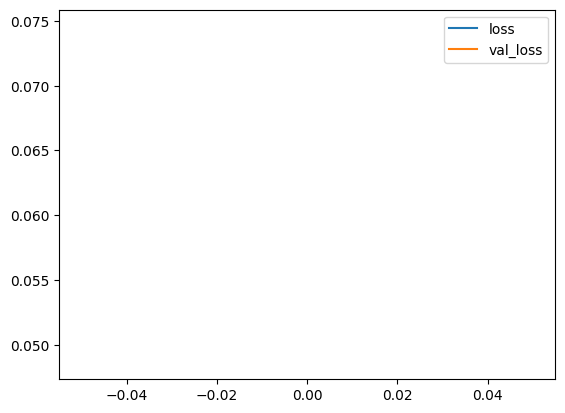

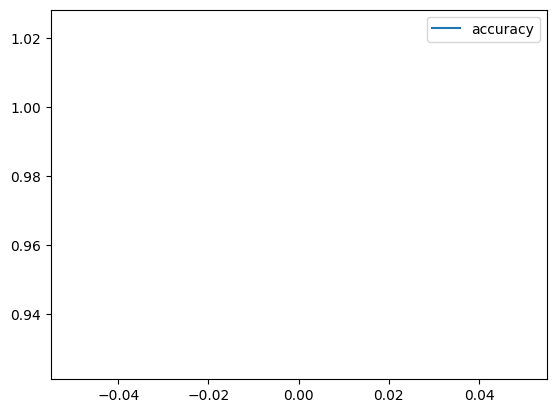

In [23]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy"]].plot();

### Fazendo predições

Predições:
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0.]
Rotulos:
 [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]


<Figure size 1000x1000 with 0 Axes>

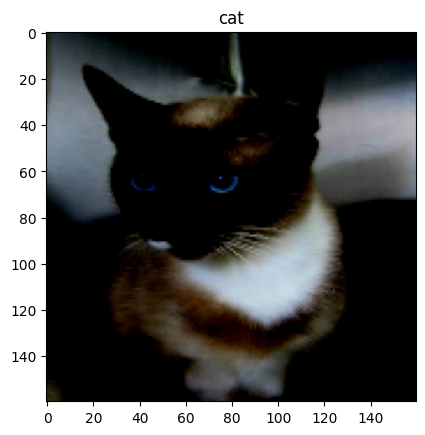

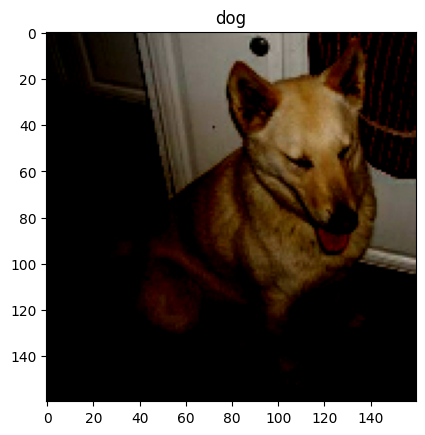

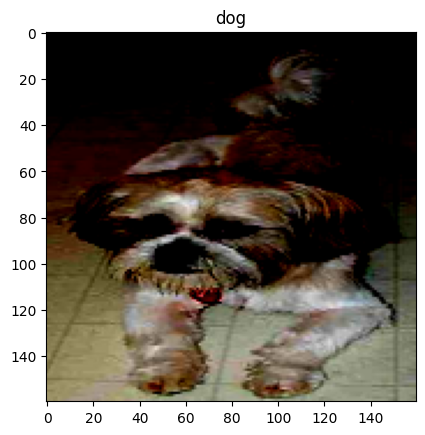

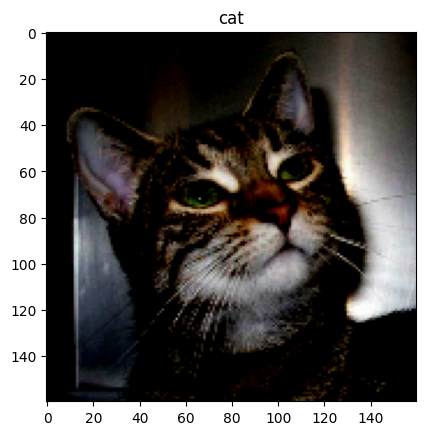

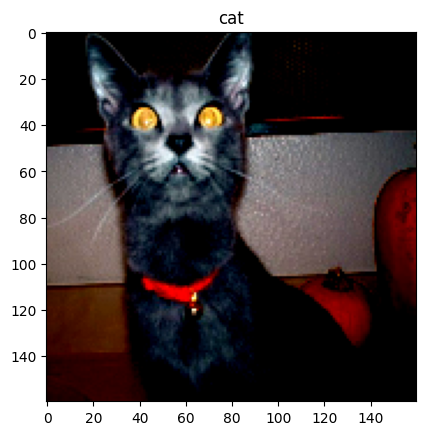

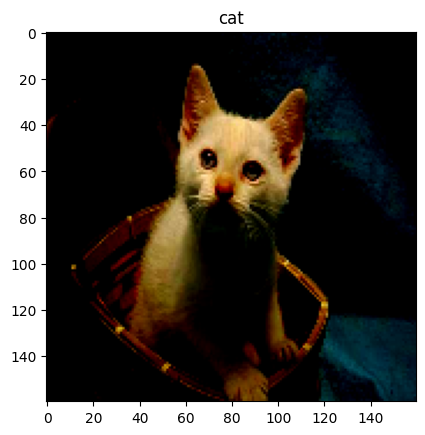

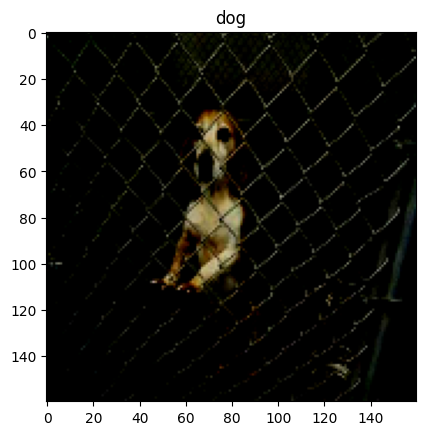

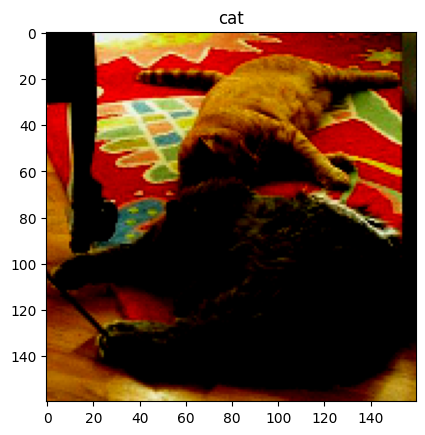

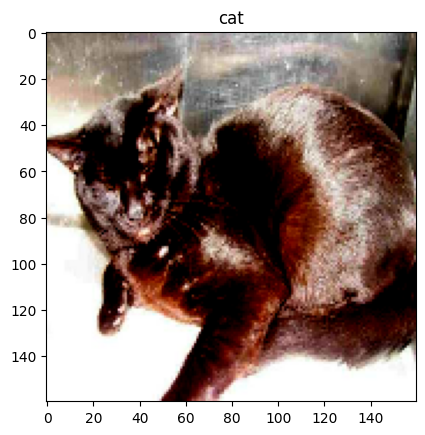

In [39]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_batches.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = np.round(predictions)

print('Predições:\n', predictions)
print('Rotulos:\n', label_batch)

plt.figure(figsize=(10, 10))
for image, label in test.take(9):
  plt.figure()
  plt.imshow(image, vmin=0,vmax=255)
  plt.title(get_label_name(label))

### Salvando a rede treinada

In [25]:
# Salvando a rede 
model.save("dogs_vs_cats.h5")

#Carregando uma rede .h5
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

## Desafio 2

Aplicar o Transfer Learning usando a rede pré-treinada ResNet50 e o conjunto de dados CIFAR-10, que possui 10 classes de objetos.

In [ ]:
### Seu código aqui....





